# Exercise 03: Arbitrary Waveforms

In this exercise, you will try to constrcut an arbitrary waveform from sines/cosines.

Install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U numpy matplotlib ipywidgets ipympl

and import the needed libraries:

In [2]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

The following code creates an interactive plot:

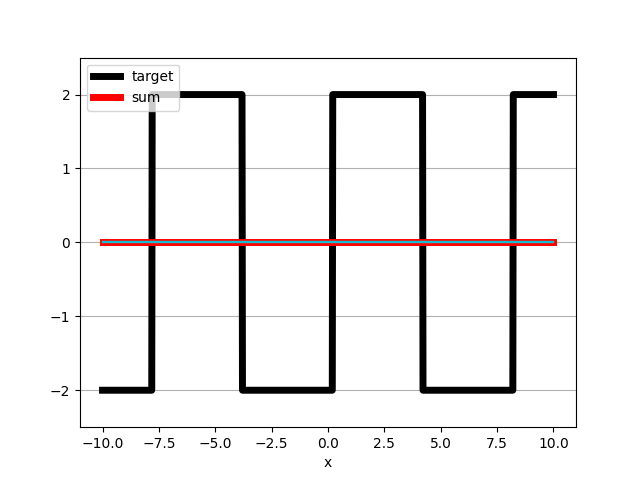

In [3]:
def create_plot():
    xs = np.linspace(-10.0,+10.0,1000)

    ys_target = 4*(np.mod(np.ceil((xs-0.2)/4),2) - 0.5)
    ys_sum    = np.zeros_like(ys_target)
    
    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax  = fig.add_subplot(1, 1, 1)
    ax.set_ylim(-2.5, +2.5)
    plt.xlabel(r'x')
    plt.grid(visible=True, which='major', axis='y')
    
    target_line, = ax.plot(xs, ys_target, color='k', linewidth=5.0)
    sum_line,    = ax.plot(xs, ys_sum,    color='r', linewidth=5.0)

    ax.legend([target_line, sum_line], ['target', 'sum'])
    
    slider_groups = []

    def get_ys(s_a, s_f, s_p):
        return s_a.value * np.sin(s_f.value*xs + s_p.value)
        
    def update_lines(change):
        ys_sum = np.zeros_like(xs)
        for info in slider_groups:            
            s_a, s_f, s_p, line = info[0], info[1], info[2], info[3]
            ys = get_ys(s_a, s_f, s_p)
            line.set_ydata(ys)
            ys_sum += ys
        sum_line.set_ydata(ys_sum)
        fig.canvas.draw_idle()

    def reset_plot(dummy):
        for info in slider_groups:            
            s_a, s_f, s_p = info[0], info[1], info[2]
            s_a.value = 0.0
            s_f.value = 1.0
            s_p.value = 0.0
            
        update_lines('dummy')  
        
    for freq in range(10):
        slider_amp   = widgets.FloatSlider(min=0.0,   max=+3.0,   step=0.01,     value=0.0, description="amp",   continuous_update=True)
        slider_freq  = widgets.FloatSlider(min=0.0,   max=+10.0,   step=0.01,     value=1.0, description="freq",  continuous_update=True)
        slider_phase = widgets.FloatSlider(min=-np.pi, max=+np.pi, step=np.pi/20, value=0.0, description="phase", continuous_update=True)

        line, = ax.plot(xs, get_ys(slider_amp, slider_freq, slider_phase))
        
        slider_amp.observe(update_lines, names='value')
        slider_freq.observe(update_lines, names='value')
        slider_phase.observe(update_lines, names='value')
        slider_groups.append( (slider_amp, slider_freq, slider_phase, line) )
        
    button_reset = widgets.Button(description='reset plot')
    button_reset.on_click(reset_plot)
    
    display(
        widgets.VBox(
            [widgets.HBox([a, f, p]) for a,f,p,l in slider_groups] + [button_reset]
        )
    )
    
create_plot()

As before, you might want to run this from time to time:

In [ ]:
plt.close('all')

I have given you a target waveform (a square wave, in bold black)
to construct, as best you can,
by summing up to ten sinusoids.
You can control the amplitudes, frequencies, and phases of the sinusoids.

Initially, all sinusoids have zero amplitude, so the sum (in bold red) will be zero.

As you adjust the sliders,
each individual sinusoid will be plotted
in some unique color,
and the sum (in bold red)
of all the sinusoids will be updated.

Your goal is to get the red sum
to match the black target
as closely as possible.

Note that it is possible to type values into the sliders
if you're finding it difficult to get the value you want
with your mouse.

**How well do you think you did?  Would it help to have more frequencies?  Is there a systematic way to adjust the sinusoids?**

YOUR ANSWER HERE

Make sure your final notebook shows your settings so that I can see your final waveform.

**What did you think of the interactive plots?**

They're really helpful but also fun to use.